TODO:

- If a word is used as negation, it adds negative contribution
- Maybe saying a comment is postive or negative, one thing is easier than another

In [1]:
%load_ext autoreload
%autoreload 2
from bugless import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

In [2]:
random.seed(42)
pairs = note_comment_pairs("avis.json")
random.shuffle(pairs)
print(len(pairs))

186993


In [3]:
for t in pairs[50:55]:
  print(t[0], preprocess(t[1], 'french', True))
for t in sorted(pairs)[10:15]:
  print(t[0], preprocess(t[1], 'french', True))

8.0 ['peur', 'extens', 'éssouflent', 'term', 'bien', 'non', 'outr', 'nouvel', 'cart', 'nouvel', 'regl', 'permettent', 'bon', 'ré', 'équilibrag', 'jeu', 'tres', 'bon', 'extens']
10.0 ['excellent', 'jeu', 'fois', 'simpl', 'subtil', 'fin', 'malin', 'attend', 'connect']
6.0 ['voil', 'version', 'plus', 'ardu', 'er', 'icic', 'reflech', 'plus', 'mouv', 'fair', 'objet', 'recuper', 'tout', 'prix', 'comment', 'empech', 'adversair', 'arriv', 'avant', 'plus', 'baguet', 'permettent', 'fair', 'coup', 'doubl', 'souvent', 'necessair', 'rest', 'cepend', 'tre', 'abord', 'pourr', 'mel', 'grand', 'plus', 'jeun', 'autour', 'tabl']
6.0 ['grand', 'classiqu', 'dis', 'pontif', 'jeu', 'réflexion', 'cuir', 'chevelu', 'souffr', 'encor', 'séquel', 'produit', 'long', 'moment', 'grattag', 'crân', 'bon', 'exercic', 'logiqu', 'bienqu', 'facteur', 'chanc', 'vien', 'souvent', 'simplifi', 'processus', 'déduct']
3.2 ['avis', 'apres', 'part', 'joueur', 'allé', 'sombr', 'avis', 'trop', 'hâtif', 'probabl', 'comm', 'pas', 'en

(array([  960.,  1147.,  6331.,  1557., 14667.,  5223., 32585., 11809.,
        55442., 57272.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

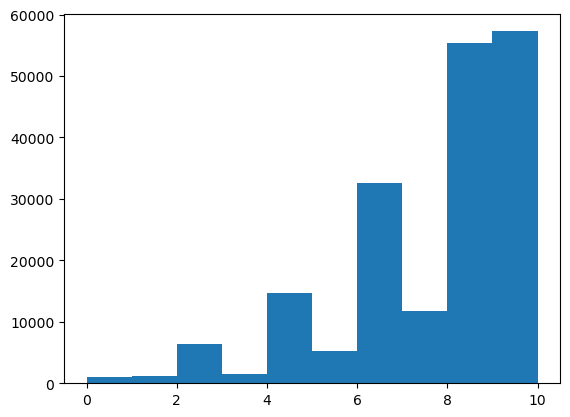

In [4]:
plt.hist([t[0] for t in pairs])

In [5]:
for t in sorted(pairs):
  if 6 <= t[0] <= 7:
    print(t[0], t[1])
    if random.random() <= 0.2:
      break

6.0  1 partie à 4 joueursCe que j’aime :* Thème :  J’aime beaucoup le thème, même si je le trouve un peu plaqué. Des fruites, une île, un paysage tropicale, c’est frais. * Mécanique :  La roue est sympa, ca me rappelle un peu celle d’Antike.* Plateau :  Je trouve le plateau très joli, avec ces couleurs et ces fruitsCe que j’aime moins :* Hasard/Attente :  Au final, je me suis retrouvé à attendre que mon tour arrive pour réfléchir, car ca peut tellement changer les choses. On se sait jamais avec quelle situation on va partir. Il faut vraiment être opportuniste* Stratégie :  C’est assez difficile de définir une stratégie car les choses bougent trop vite et on ne sait pas trop sur quels types de fruits on peut se concentrer. En effet, si pénurie, on les perd tous. Je trouve que ça reste un jeu d’opportunisme. Difficile d’élaborer une stratégie. Je comparerai volontier ce jeu à Alhambra. Dans les deux jeux, je trouve qu’on ne peut pas trop anticiper les mouvements, car les coups des autres

In [6]:
for t in sorted(pairs):
  if 4 <= t[0] <= 5:
    print(t[0], t[1])
    if random.random() <= 0.2:
      break

4.0  1 partie à 4 joueurs débutants Ce que j’aime :* Thème :  J’aime beaucoup le thème. La course de chien de traineau est bien trouvé et bien retranscrite.* Mécanique :  Sur le papier, les coûts des déplacements latéraux, de pouvoir enchainer les cartes de même valeur et le bonus de position pour des forces de chiens de force égale sont des trucs sympas* Le traineau :  Il est bien fait avec des places pour les cartes, le frein, et surtout la couleur des drapeaux pour la gauche et la droiteCe que j’aime moins :* Calculatoire :  Ce qui m’a le plus choqué c’est le côté calculatoire du jeu. On se retrouve vite à compter dans son coin et ne pas voir ce que font les autres. Ce n’est pas un jeu très compliqué en soi, mais je le côté je compte combien de cases j’avance, combien de case je me décale sur le côté, n’est pas très évident et dessert le côté fun.* Lisibilité du plateau :  Personnellement, j’ai eu du mal à savoir qui était premier, quelles cases je pouvais me décaler latéralement et

## Comment

It wouldn't be fair to say a game of 4~6 points is negative or positive. So let's consider games of score lower than 3 or higher than 8.

In [7]:
pairs = [t for t in pairs if t[0]<=3 or t[0] >= 8]

In [8]:
print(len(pairs))
for t in pairs[:5]:
  if t[0] >= 8:
    print(t[0], t[1])
for t in pairs[:1000]:
  if t[0] <= 3:
    print(t[0], t[1])

121542
8.0 Un petit jeu très sympa...le seul inconvénient est le temps d'installation même si ca ne prend pas des heures.Amusant pour les grands, comme les petits (mais pas trop....mini mini 6 ans, voire plutot plus)
10.0 Très simple a expliquer et a jouer, tout les coups se jouent en simultané donc on attend jamais son tour. Un de mes préférés d'ALEA. Parfait pour initier les joueurs occasionnels ou les non joueurs!
9.7 J'ai longtemps eu du mal à apprécier le côté "ludique" des jeux de gestion à l'allemande. Si mon esprit scientifique me permet généralement d'évoluer avec une relative facilité dans cet univers de cubes en bois, je considère beaucoup de ces jeux comme des exercices intellectuels qui manquent d'âme (thème absent, matériel austère) et de vie (ambiance studieuse autour de la table) : des sortes de sudokus collectifs. Je trouve beaucoup plus amusant de lutter contre un gobelin hystérique ou la tension provoquée par un lancer de dés miraculeux qui anéantit votre unité d'inf

In [9]:
# random.shuffle(pairs)

In [10]:
# pairs = pairs[:10000]
# corpus = [preprocess(t[1], 'french', True) for t in pairs]
# vectors = tfidf(corpus)
# print(vectors.shape)

In [11]:
def knn(labels, vectors, k : int, metric : str):
  cnt = np.zeros((2, 2), dtype=np.int64)
  distances = metrics.pairwise_distances(vectors, metric=metric, n_jobs=-1)
  for i in range(distances.shape[0]):
    idx = np.argsort(distances[i])
    pos = 0
    for j in range(1, k+1):
      if labels[idx[j]]:
        pos += 1+(k-j)*0.01
      else:
        pos -= 1+(k-j)*0.01
    pos = pos>0
    cnt[int(labels[i]), int(pos)] += 1
  print(cnt[0,0]/(cnt[0,0]+cnt[0,1]), cnt[1,1]/(cnt[1,0]+cnt[1,1]))
  print(cnt)

In [12]:
# labels = np.array([t[0]>=5 for t in pairs])

In [13]:
# vectors = csr_matrix(vectors)
# knn(labels, vectors, 1, 'cosine')
# knn(labels, vectors, 2, 'cosine')
# knn(labels, vectors, 3, 'cosine')
# knn(labels, vectors, 4, 'cosine')
# knn(labels, vectors, 5, 'cosine')

## Comment

I should try balance the negatives and positives.

```
0.266304347826087 0.9427892918825561
[[ 196  540]
 [ 530 8734]]
```

In [14]:
random.seed(42)
pairs = note_comment_pairs("avis.json")
pairs = dedup(pairs)
bads = [t for t in pairs if t[0] <= 3]
goods = [t for t in pairs if t[0] >= 8]

In [15]:
print(len(bads), len(goods))

7037 84212


In [16]:
random.shuffle(bads)
random.shuffle(goods)
pairs = bads[:5000] + goods[:5000]
random.shuffle(pairs)
corpus = [preprocess(t[1], 'french', True) for t in pairs]
vectors = csr_matrix(tfidf(corpus))
print(vectors.shape)

(10000, 21007)


In [17]:
labels = np.array([t[0]>=5 for t in pairs])
knn(labels, vectors, 1, 'cosine')
knn(labels, vectors, 2, 'cosine')
knn(labels, vectors, 3, 'cosine')
knn(labels, vectors, 4, 'cosine')
knn(labels, vectors, 5, 'cosine')

0.6986 0.6326
[[3493 1507]
 [1837 3163]]
0.6986 0.6326
[[3493 1507]
 [1837 3163]]
0.7384 0.6694
[[3692 1308]
 [1653 3347]]
0.778 0.6238
[[3890 1110]
 [1881 3119]]
0.7606 0.691
[[3803 1197]
 [1545 3455]]


In [18]:
knn(labels, vectors, 1, 'euclidean')
knn(labels, vectors, 2, 'euclidean')
knn(labels, vectors, 3, 'euclidean')
knn(labels, vectors, 4, 'euclidean')
knn(labels, vectors, 5, 'euclidean')

0.2176 0.905
[[1088 3912]
 [ 475 4525]]
0.2176 0.905
[[1088 3912]
 [ 475 4525]]
0.204 0.9344
[[1020 3980]
 [ 328 4672]]
0.2504 0.9104
[[1252 3748]
 [ 448 4552]]
0.354 0.8526
[[1770 3230]
 [ 737 4263]]


In [19]:
knn(labels, vectors, 6, 'cosine')
knn(labels, vectors, 7, 'cosine')
knn(labels, vectors, 8, 'cosine')
knn(labels, vectors, 9, 'cosine')
knn(labels, vectors, 10, 'cosine')

0.7614 0.695
[[3807 1193]
 [1525 3475]]
0.7884 0.701
[[3942 1058]
 [1495 3505]]
0.7906 0.6976
[[3953 1047]
 [1512 3488]]
0.7998 0.721
[[3999 1001]
 [1395 3605]]
0.7966 0.7222
[[3983 1017]
 [1389 3611]]


In [20]:
knn(labels, vectors, 13, 'cosine')
knn(labels, vectors, 13, 'euclidean')

0.8092 0.7376
[[4046  954]
 [1312 3688]]
0.7742 0.4572
[[3871 1129]
 [2714 2286]]


In [21]:
knn(labels, vectors, 21, 'cosine')

0.8284 0.7572
[[4142  858]
 [1214 3786]]


In [22]:
knn(labels, vectors, 55, 'cosine')

0.8522 0.7964
[[4261  739]
 [1018 3982]]


In [23]:
knn(labels, vectors, 100, 'cosine')

0.8612 0.8132
[[4306  694]
 [ 934 4066]]


In [24]:
knn(labels, vectors, 500, 'cosine')

0.857 0.857
[[4285  715]
 [ 715 4285]]


In [25]:
knn(labels, vectors, 1000, 'cosine')

0.8332 0.8836
[[4166  834]
 [ 582 4418]]


In [26]:
knn(labels, vectors, 2000, 'cosine')

0.7932 0.908
[[3966 1034]
 [ 460 4540]]


In [27]:
knn(labels, vectors, 5000, 'cosine')

0.6984 0.9378
[[3492 1508]
 [ 311 4689]]


## Comment

Even k-s favored the negative comment (case of tie, so I added something to break the tie).

We noticed the cosine norm is way better, but we didn't normalize our vectors, which disfavors euclidean norm.

We can do 85% accuracy, it's already satisfying because we didn't consider the structures of the phrases at all.

The reason I added `(k-j)*0.01` to favor closer neighbor is because I noticed there were ties, but the difference is little as we may notice in the following.

In fact, I had a bug which leaded to considering each letter as a term. And I get 60% accuracy...

```
0.5578 0.6454
[[2789 2211]
 [1773 3227]]
```

## Difficulties

- Didn't consider the order of words
- If we want to classify the types of game, how to proceed?
- Why 'pas' is considered as a stopword?

In [28]:
def knn(labels, vectors, k : int, metric : str):
  cnt = np.zeros((2, 2), dtype=np.int64)
  distances = metrics.pairwise_distances(vectors, metric=metric, n_jobs=-1)
  for i in range(distances.shape[0]):
    idx = np.argsort(distances[i])
    pos = 0
    for j in range(1, k+1):
      if labels[idx[j]]:
        pos += 1
      else:
        pos -= 1
    pos = pos>0
    cnt[int(labels[i]), int(pos)] += 1
  print(cnt[0,0]/(cnt[0,0]+cnt[0,1]), cnt[1,1]/(cnt[1,0]+cnt[1,1]))
  print(cnt)

In [29]:
knn(labels, vectors, 500, 'cosine')

0.8444 0.8642
[[4222  778]
 [ 679 4321]]


In [30]:
knn(labels, vectors, 200, 'cosine')

0.865 0.8306
[[4325  675]
 [ 847 4153]]


In [31]:
knn(labels, vectors, 50, 'cosine')

0.8644 0.7734
[[4322  678]
 [1133 3867]]


In [32]:
knn(labels, vectors, 10, 'cosine')

0.8566 0.6412
[[4283  717]
 [1794 3206]]
